In [11]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We consider a database containing six characterizing measurements for batches of plastic pellets. The outcome when using this material, either ”Poor” or ”Adequate”, is also provided. The goal is to classify material lots according to quality, starting from the measurements.


In [ ]:
dataframe = pd.read_csv("https://openmv.net/file/raw-material-characterization.csv")
data = dataframe.to_numpy()
A = data[:, 2:].astype(np.float64)
labels = data[:, 1]
groups = ("Adequate", "Poor")

A.shape, labels.shape

((24, 6), (24,))

How many samples are there in the dataset? How many poor quality and adequate quality samples are there?


In [ ]:
n_samples = A.shape[0]
print("There are %d samples" % n_samples)

There are 24 samples


In [ ]:
adequate = A[labels == "Adequate", :]
poor = A[labels == "Poor", :]

n_adequate = adequate.shape[0]
n_poor = poor.shape[0]

print("There are %d adequate samples" % n_adequate)
print("There are %d poor samples" % n_poor)

There are 17 adequate samples
There are 7 poor samples


By exploiting the SVD decomposition, perform PCA on the provided data. Then, plot the trend of the singular values k in logarithmic scale.


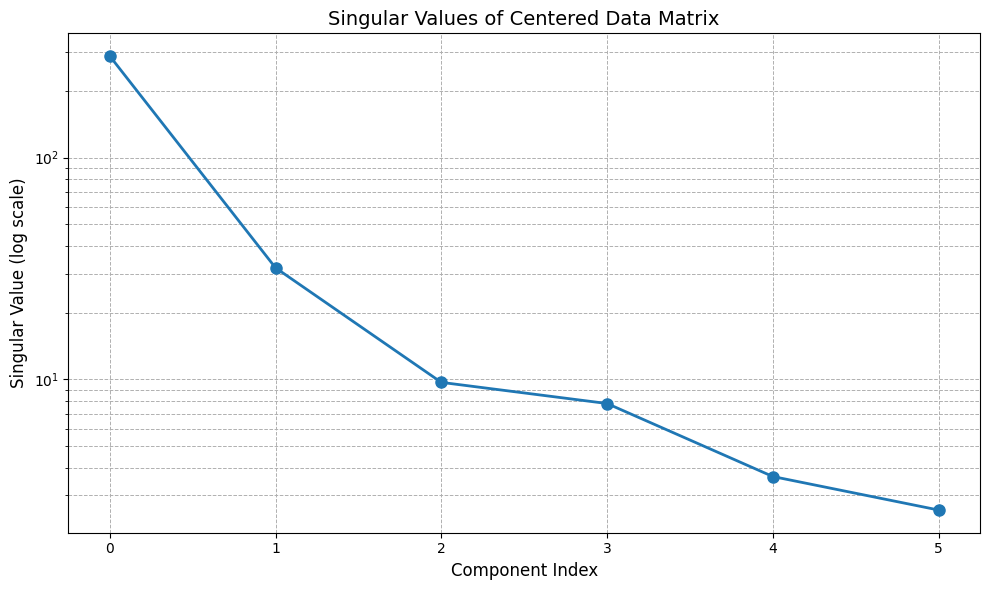

In [ ]:
A = A.T  # transpose so samples are columns

# Compute mean of each row (feature)
A_mean = np.mean(A, axis=1)

# Center data by subtracting mean vector from each column (sample)
A_centered = A - A_mean[:, None]

# Perform SVD
U, s, VT = np.linalg.svd(A_centered, full_matrices=False)

# Plot singular values on a semilog-y scale
plt.figure(figsize=(10, 6))
plt.semilogy(s, "o-", markersize=8, linewidth=2, color="tab:blue")
plt.title("Singular Values of Centered Data Matrix", fontsize=14)
plt.xlabel("Component Index", fontsize=12)
plt.ylabel("Singular Value (log scale)", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()

Compute a matrix containing the principal components associated with the dataset.


In [17]:
Phi = np.matmul(U.transpose(), A - A_mean[:, None])
Phi.shape

(6, 24)

Generate a scatterplot of the rst two principal components of the dataset, grouped by label.


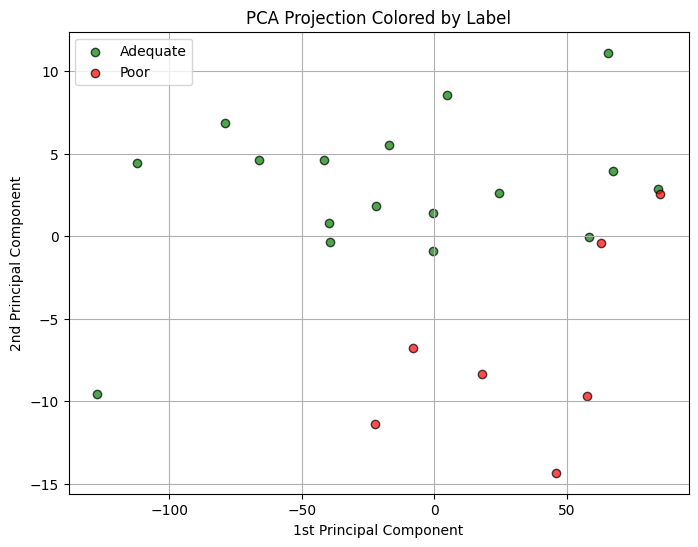

In [ ]:
# Convert labels to numpy array if not already
labels = np.array(labels)

# Find indices for each class
idx_adequate = labels == "Adequate"
idx_other = ~idx_adequate

plt.figure(figsize=(8, 6))

# Plot Adequate points in green
plt.scatter(
    Phi[0, idx_adequate],
    Phi[1, idx_adequate],
    color="g",
    label="Adequate",
    alpha=0.7,
    edgecolors="k",
)

# Plot other points in red
plt.scatter(
    Phi[0, idx_other],
    Phi[1, idx_other],
    color="r",
    label="Poor",
    alpha=0.7,
    edgecolors="k",
)

plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("PCA Projection Colored by Label")
plt.legend()
plt.grid(True)
plt.show()

Propose a simple classifier to discriminate among poor and adequate quality materials, based on the second principal component. Then compute the accuracy of the classifier (i.e. the fraction of correctly classifed samples).


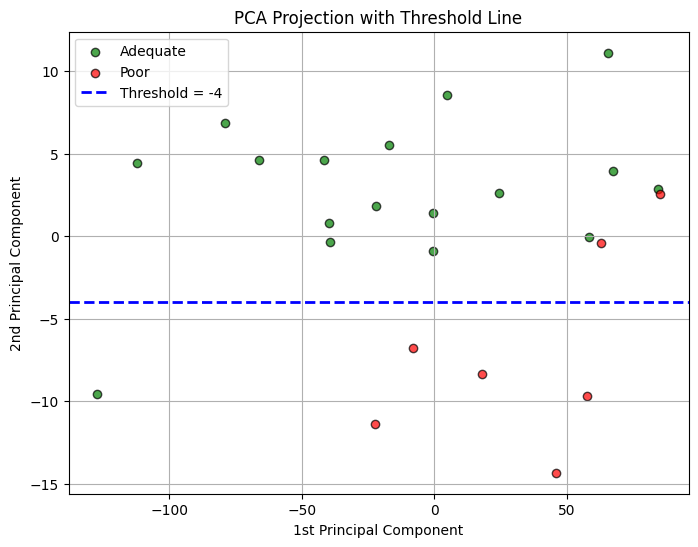

In [ ]:
threshold = -4

labels = np.array(labels)  # ensure labels is an array

idx_adequate = labels == "Adequate"
idx_other = ~idx_adequate

plt.figure(figsize=(8, 6))

# Plot points grouped by label
plt.scatter(
    Phi[0, idx_adequate],
    Phi[1, idx_adequate],
    color="g",
    label="Adequate",
    alpha=0.7,
    edgecolors="k",
)
plt.scatter(
    Phi[0, idx_other],
    Phi[1, idx_other],
    color="r",
    label="Poor",
    alpha=0.7,
    edgecolors="k",
)

# Add horizontal threshold line
plt.axhline(
    y=threshold,
    color="blue",
    linestyle="--",
    linewidth=2,
    label=f"Threshold = {threshold}",
)

plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("PCA Projection with Threshold Line")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Convert labels to numpy array for easy comparison
labels = np.array(labels)

# Predicted labels based on threshold on second principal component
predicted_labels = np.where(Phi[1, :] >= threshold, "Adequate", "Poor")

# Compute accuracy: fraction of correct predictions
accuracy = np.mean(predicted_labels == labels)

print(f"Accuracy based on threshold {threshold}: {accuracy * 100:.2f}%")

Accuracy based on threshold -4: 87.50%


# Exercise 2


In [ ]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

np.random.seed(0)

Consider the function

$$
f(x) = f_1(x) + f_2(x) \tag{1}
$$

where $f_1(x) = (x-1)^2$ and $f_2(x) = (x+1)^2$.


In [ ]:
def f1(x):
    return (x - 1) ** 2


def f2(x):
    return (x + 1) ** 2


def f(x):
    return f1(x) + f2(x)

In [ ]:
df1 = jax.jit(jax.grad(f1))
df2 = jax.jit(jax.grad(f2))

dfs = [df1, df2]  # Function to compute the exact gradient wrt f1 or f2

In [ ]:
df1 = jax.jit(jax.grad(f1))
df2 = jax.jit(jax.grad(f2))

dfs = [df1, df2]  # Function to compute the exact gradient wrt f1 or f2

Minimum of function f is y = 2.00, found at x = 0.00
Minimum of function f1 is y = 0.00, found at x = 1.00
Minimum of function f2 is y = 0.00, found at x = -1.00


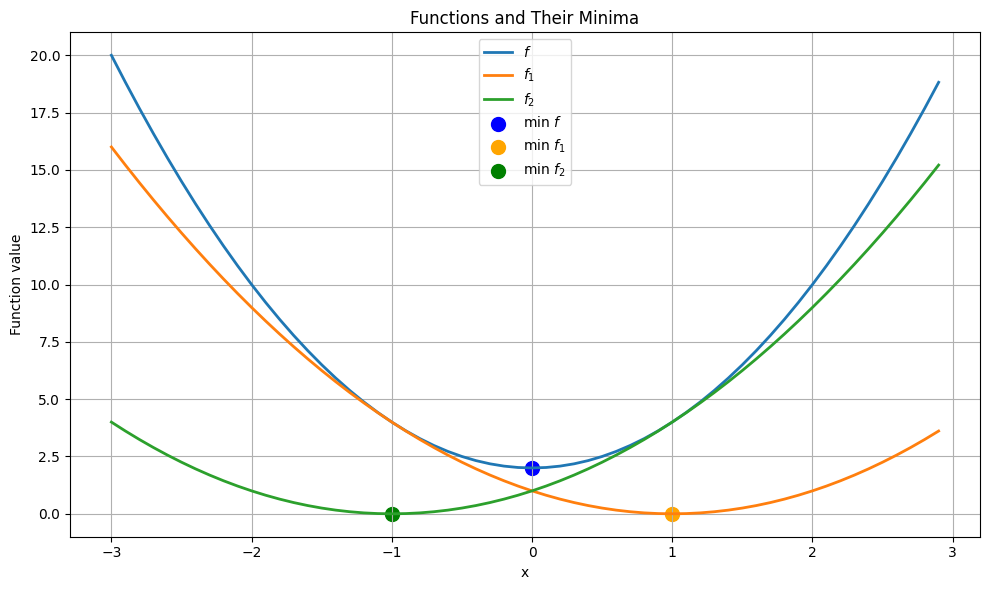

In [ ]:
x = np.arange(-3, 3, 0.1)
y1 = f1(x)
y2 = f2(x)
y = f(x)

# Find minima and their x locations
min_f_x = x[np.argmin(y)]
min_f_y = y.min()

min_f1_x = x[np.argmin(y1)]
min_f1_y = y1.min()

min_f2_x = x[np.argmin(y2)]
min_f2_y = y2.min()

# Print results with formatted strings
print(f"Minimum of function f is y = {min_f_y:.2f}, found at x = {min_f_x:.2f}")
print(f"Minimum of function f1 is y = {min_f1_y:.2f}, found at x = {min_f1_x:.2f}")
print(f"Minimum of function f2 is y = {min_f2_y:.2f}, found at x = {min_f2_x:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="$f$", linewidth=2)
plt.plot(x, y1, label="$f_1$", linewidth=2)
plt.plot(x, y2, label="$f_2$", linewidth=2)

# Mark minima points
plt.scatter([min_f_x], [min_f_y], color="blue", s=100, marker="o", label="min $f$")
plt.scatter(
    [min_f1_x], [min_f1_y], color="orange", s=100, marker="o", label="min $f_1$"
)
plt.scatter([min_f2_x], [min_f2_y], color="green", s=100, marker="o", label="min $f_2$")

plt.xlabel("x")
plt.ylabel("Function value")
plt.title("Functions and Their Minima")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Use the Stochastic Gradient Descent (SGD) method to find the minimum of $f(x)$; each iteration of the SGD is given by

$$
x_{k+1} = x_k - \eta_k - \nabla f_{i(k)}(x_k), \tag{2}
$$

where $i(k) \in \{1, 2\}$ is drawn uniformly.

Initialize the method with a random initial condition $x_0$ and perform 5000 iterations; consider the following two choices for $\eta_k$:

- $\eta_k = \eta = 10^{-3}$
- $\eta_k = {{1} \over {10 + k}}$


In [ ]:
def residual(x):
    return jnp.linalg.norm(f(x) - min_f_y)


def difference(x, x_next):
    return jnp.linalg.norm(f(x) - f(x_next))


res = jax.jit(residual)
diff = jax.jit(difference)

x_guess = np.random.rand()

max_iter = 5000
step_size = 1.0e-3

In [ ]:
# Initialize random guess
const_res_history = []
const_diff_history = []
const_x_history = []

const_res_history.append(float(res(x_guess)))
const_x_history.append(float(x_guess))

x_copy = x_guess
for i in range(max_iter):
    grad = dfs[np.random.randint(0, 2)](x_guess)  # stochastic gradient
    x_guess -= step_size * grad
    const_res_history.append(float(res(x_guess)))
    const_diff_history.append(float(diff(x_copy, x_guess)))
    const_x_history.append(float(x_guess))
    x_copy = x_guess

print(f"Final x_guess: {x_guess}")

Final x_guess: 0.041097819805145264


Plot the convergence history in the two cases.


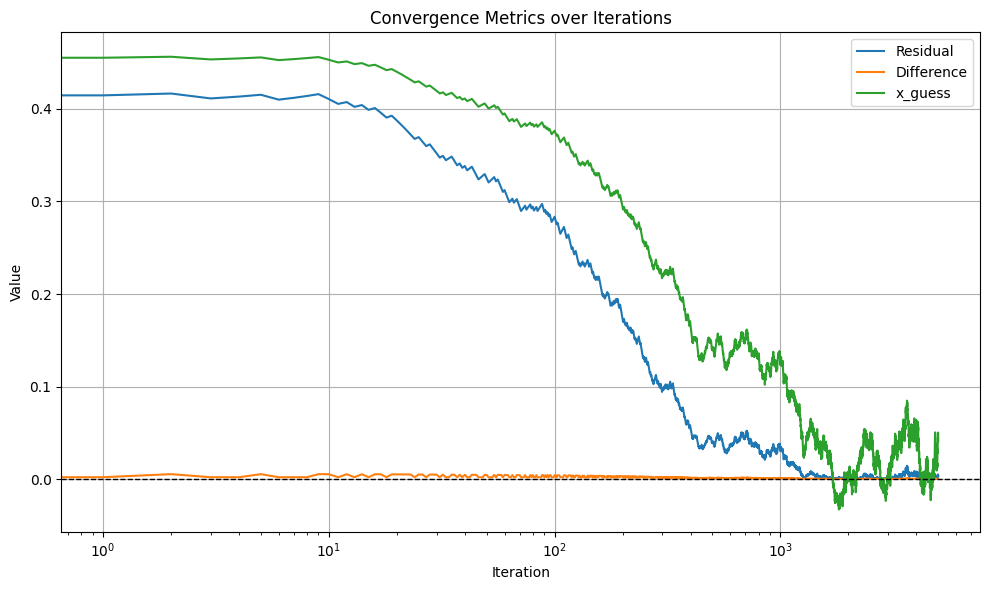

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(const_res_history, label="Residual")
plt.semilogx(const_diff_history, label="Difference")
plt.semilogx(const_x_history, label="x_guess")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Convergence Metrics over Iterations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Final x_guess: 0.018298964947462082


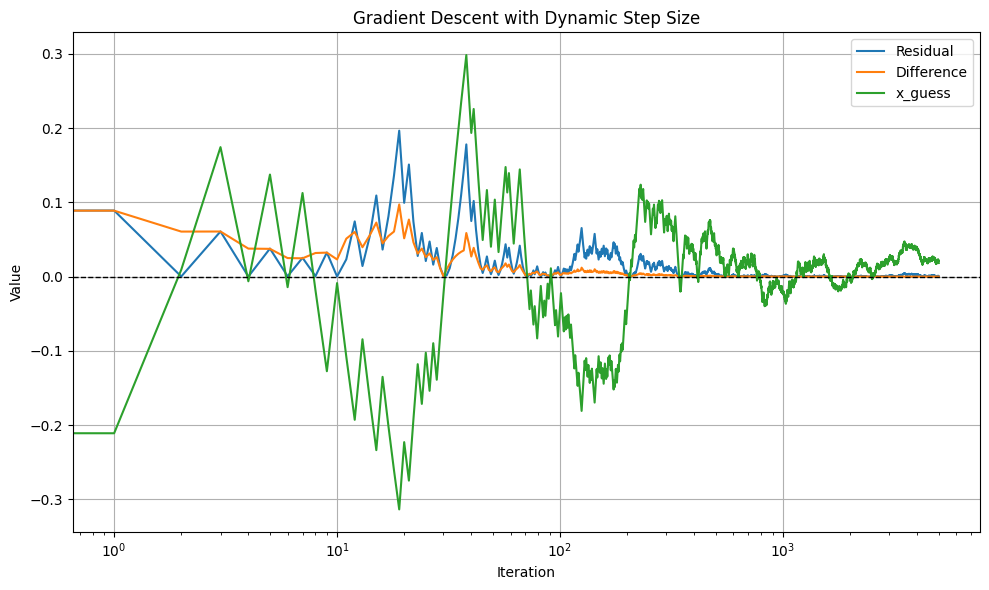

In [ ]:
dyn_res_history = []
dyn_diff_history = []
dyn_x_history = []

dyn_res_history.append(float(res(x_guess)))
dyn_x_history.append(float(x_guess))

x_copy = x_guess
for i in range(max_iter):
    step_size = 1 / (10 + i)  # dynamic step size decreasing with iterations
    grad = dfs[np.random.randint(0, 2)](x_guess)
    x_guess -= step_size * grad
    dyn_res_history.append(float(res(x_guess)))
    dyn_diff_history.append(float(diff(x_copy, x_guess)))
    dyn_x_history.append(float(x_guess))
    x_copy = x_guess

print(f"Final x_guess: {x_guess}")

plt.figure(figsize=(10, 6))
plt.semilogx(dyn_res_history, label="Residual")
plt.semilogx(dyn_diff_history, label="Difference")
plt.semilogx(dyn_x_history, label="x_guess")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Gradient Descent with Dynamic Step Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Find experimentally how the quantity $ E(f(x_k)) − f(x^∗)$

(where $x^∗$ is the point where $f(x)$ attains the minimum)
depends on the number of performed iteration. Comment the result.


Expected value after 100 iterations: 2.1985
Expected value after 250 iterations: 2.0913
Expected value after 500 iterations: 2.0648
Expected value after 1000 iterations: 2.0301
Expected value after 1500 iterations: 2.0176
Expected value after 2500 iterations: 2.0079
Expected value after 5000 iterations: 2.0032
Expected value after 7500 iterations: 2.0073
Expected value after 10000 iterations: 2.0042
Expected value after 15000 iterations: 2.0021
Expected value after 20000 iterations: 2.0021
Expected value after 40000 iterations: 2.0008


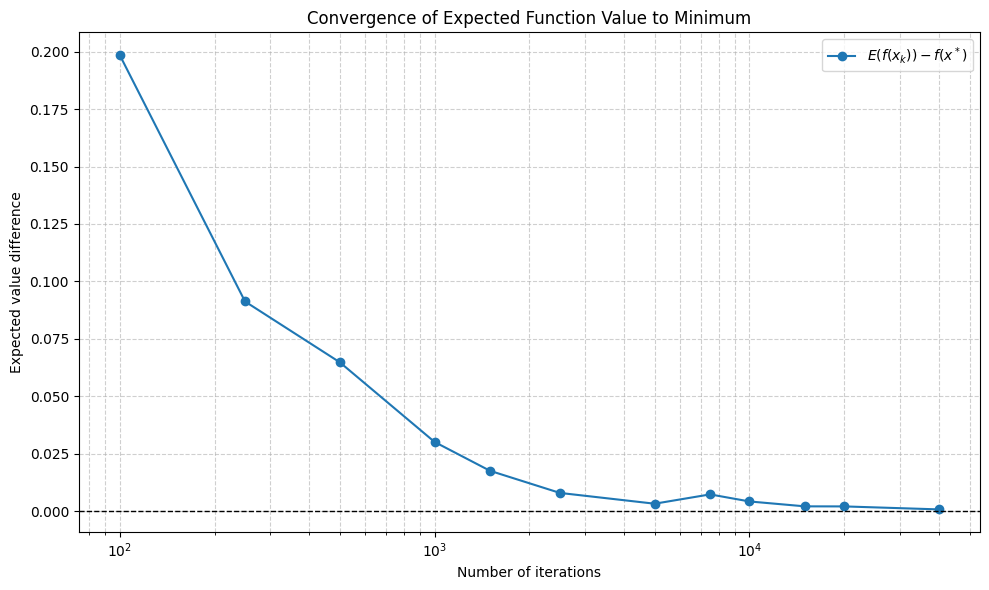

In [49]:
max_iter_list = [
    100,
    250,
    500,
    1000,
    1500,
    2500,
    5000,
    7500,
    10000,
    15000,
    20000,
    40000,
]

expected_value_history = []

for max_iter in max_iter_list:
    x_guess = np.random.rand()

    dyn_x_history = [x_guess]

    for i in range(max_iter):
        step_size = 1 / (i + 1)
        grad = dfs[np.random.randint(0, 2)](x_guess)
        x_guess -= step_size * grad
        dyn_x_history.append(x_guess)

    # Compute expected value of f(x) over the trajectory
    f_values = f(jnp.array(dyn_x_history))
    E = jnp.mean(f_values)
    print(f"Expected value after {max_iter} iterations: {E:.4f}")
    expected_value_history.append(float(E))

expected_value_history = np.array(expected_value_history)
diff = expected_value_history - min_f_y

plt.figure(figsize=(10, 6))
plt.plot(max_iter_list, diff, "o-", label=r"$E(f(x_k)) - f(x^*)$")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel(r"Expected value difference")
plt.title("Convergence of Expected Function Value to Minimum")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


As we can see, the higher the number of iterations, the better is the approximation of the minimum.

This is due to the dynamic step-size: it starts "big" ($\eta_0 = 0.1 $) and get smaller and smaller as the iterations continue. A big step-size makes the approximation to go past the exact solution, at each iteration: the behaviour is "ondulatory" across the exact solution, and hence the expected value of the history is the exact value.